# **Step By Step Guide to Satellite Imaging Deep Learing**

In [ ]:
!pip install patchify

***Requirements***

In [ ]:
import os
import cv2
from PIL import Image
import numpy as np
from  patchify import patchify
from sklearn.preprocessing import MinMaxScaler, StandardScaler # fro normalization of img
from matplotlib import pyplot as plt
import random

In [ ]:
minmaxscaler = MinMaxScaler()

***Dataset Repository import***

In [ ]:
# upload data
!ls -lah '/content/drive/MyDrive/DubiaDataset'

total 33K
-rw------- 1 root root  548 May 12 15:20  classes.json
drwx------ 2 root root 4.0K May 12 15:27 'Tile 1'
drwx------ 2 root root 4.0K May 12 15:27 'Tile 2'
drwx------ 2 root root 4.0K May 12 15:27 'Tile 3'
drwx------ 2 root root 4.0K May 12 15:27 'Tile 4'
drwx------ 2 root root 4.0K May 12 15:27 'Tile 5'
drwx------ 2 root root 4.0K May 12 15:27 'Tile 6'
drwx------ 2 root root 4.0K May 12 15:27 'Tile 7'
drwx------ 2 root root 4.0K May 12 15:27 'Tile 8'


In [ ]:
dataset_root_folder= '/content/drive/MyDrive/'

In [ ]:
dataset_name="DubiaDataset"

In [ ]:
#helps to select a particular folder : os.walk()
for path,subdirs, files in os.walk(os.path.join(dataset_root_folder,dataset_name)):
  dir_name=path.split(os.path.sep)[-1]
  #print(dir_name)
  if dir_name=='images':
    images=os.listdir(path)
    print(path)
    #print(images)  # img as an array in O/P
    #for i ,image_name in enumerate(images):
      #if (image_name.endswith('.jpg')):     # img =.jpg and masks=.png
       #print(image_name)

/content/drive/MyDrive/DubiaDataset/Tile 8/images
/content/drive/MyDrive/DubiaDataset/Tile 1/images
/content/drive/MyDrive/DubiaDataset/Tile 6/images
/content/drive/MyDrive/DubiaDataset/Tile 4/images
/content/drive/MyDrive/DubiaDataset/Tile 7/images
/content/drive/MyDrive/DubiaDataset/Tile 3/images
/content/drive/MyDrive/DubiaDataset/Tile 2/images
/content/drive/MyDrive/DubiaDataset/Tile 5/images


In [ ]:
image_patch_size=256

In [ ]:
image=cv2.imread(f'{dataset_root_folder}/{dataset_name}/Tile 2/images/image_part_001.jpg',1)

In [ ]:
# here image is numpy array
#  image_patches=patchify(image, (image_patch_size, image_patch_size, 3), step=image_patch_size)

In [ ]:
# image_patches
# len(image_patches)
# # print(image_patches.shape)
# print(image_patches.shape[0])

In [ ]:
minmaxscaler = MinMaxScaler()

In [ ]:
# #minmacscaler
# image_x = image_patches[0,0,:,:]

# image_y = minmaxscaler.fit_transform(image_x.reshape(-1,image_x.shape[-1])).reshape(image_x.shape)
# print(image_y.shape)
# print(image_y[0].shape)

In [ ]:
image.shape
# image.shape : tells img height/width/color(either gray or rgb)

(544, 509, 3)

In [ ]:
print(type(image),'previous type')
# change the tpe of img from numpy.ndarray to image type
print(type(Image.fromarray(image)),'new type')

<class 'numpy.ndarray'> previous type
<class 'PIL.Image.Image'> new type


In [ ]:
# (image.shape[1]//image_patch_size)*image_patch_size

In [ ]:
image_dataset=[]
mask_dataset=[]

#image_extension='jpg' #'png' for masks 'jpg' for images

for image_type in ['masks' ,'masks']: # 'images' 'masks'

  if image_type == 'images':
    image_extension='jpg'

  elif image_type == 'masks':
    image_extension='png'

  for tile_id in range(1,8):
    for image_id in range(1,20):
      image=cv2.imread(f'{dataset_root_folder}/{dataset_name}/Tile {tile_id}/images/image_part_00{image_id}.{image_extension}',1)

      if image is not None:
        # make sure that images are in right rgb format
        if image_type == 'masks':
          image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        #print(image.shape)

        size_x = (image.shape[1]//image_patch_size)*image_patch_size
        size_y = (image.shape[0]//image_patch_size)*image_patch_size
        #print("{} --- {} - {}".format(image.shape,size_x,size_y))

        image = Image.fromarray(image) # type of img is Image now
        image = image.crop((0,0, size_x, size_y))

      # print(image.shape)  #gives error as previously img was in array and array has the shape not the Type Image

      # print("({},  {})".format(image.size[0],image.size[1])) # images has be croped

        image=np.array(image) #converting img back to np array as patchify works only on np array and not the IMAGE Type
        patched_images=patchify(image, (image_patch_size, image_patch_size, 3), step=image_patch_size)
        #print(len(patched_image))

        for i in range(patched_images.shape[0]):
          for j in range(patched_images.shape[1]):
            if image_type == 'images':
              individual_patched_image = patched_images[i,j :,:]
              #print(individual_patched_image.shape)

              # minmaxscaling : normalizing the imgages
              individual_patched_image = minmaxscaler.fit_transform(individual_patched_image.reshape(-1,individual_patched_image.shape[-1])).reshape(individual_patched_image.shape)
              individual_patched_image = individual_patched_image[0]
            #print(individual_patched_image.shape) # now it gives perfect 255/255 image
            elif image_type == 'masks':
              individual_patched_mask = patched_images[i,j :,:]
              individual_patched_mask =  individual_patched_mask[0]
              mask_dataset.append(individual_patched_mask)



In [ ]:
image_dataset = []
mask_dataset = []

for image_type in ['images' , 'masks']:
  if image_type == 'images':
    image_extension = 'jpg'
  elif image_type == 'masks':
     image_extension = 'png'

  for tile_id in range(1,8):
    for image_id in range(1,20):

      image = cv2.imread(f'{dataset_root_folder}/{dataset_name}/Tile {tile_id}/{image_type}/image_part_00{image_id}.{image_extension}',1)

      if image is not None:
        if image_type == 'masks':
          image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        #print(image.shape)
        size_x = (image.shape[1]//image_patch_size)*image_patch_size
        size_y = (image.shape[0]//image_patch_size)*image_patch_size

        #print("{} --- {} - {}".format(image.shape, size_x, size_y))
        image = Image.fromarray(image)
        image = image.crop((0,0, size_x, size_y))

        #print("({},  {})".format(image.size[0],image.size[1]))
        image = np.array(image)
        patched_images = patchify(image, (image_patch_size, image_patch_size, 3), step=image_patch_size)
        #print(len(patched_images))

        for i in range(patched_images.shape[0]):
          for j in range(patched_images.shape[1]):
            if image_type == 'images':
              individual_patched_image = patched_images[i,j,:,:]

              print(individual_patched_image.shape)
              individual_patched_image = minmaxscaler.fit_transform(individual_patched_image.reshape(-1, individual_patched_image.shape[-1])).reshape(individual_patched_image.shape)
              individual_patched_image = individual_patched_image[0]

              print(individual_patched_image.shape)
              image_dataset.append(individual_patched_image)

            elif image_type == 'masks':
              individual_patched_mask = patched_images[i,j,:,:]
              individual_patched_mask = individual_patched_mask[0]
              mask_dataset.append(individual_patched_mask)

(1, 256, 256, 3)
(256, 256, 3)
(1, 256, 256, 3)
(256, 256, 3)
(1, 256, 256, 3)
(256, 256, 3)
(1, 256, 256, 3)
(256, 256, 3)
(1, 256, 256, 3)
(256, 256, 3)
(1, 256, 256, 3)
(256, 256, 3)
(1, 256, 256, 3)
(256, 256, 3)
(1, 256, 256, 3)
(256, 256, 3)
(1, 256, 256, 3)
(256, 256, 3)
(1, 256, 256, 3)
(256, 256, 3)
(1, 256, 256, 3)
(256, 256, 3)
(1, 256, 256, 3)
(256, 256, 3)
(1, 256, 256, 3)
(256, 256, 3)
(1, 256, 256, 3)
(256, 256, 3)
(1, 256, 256, 3)
(256, 256, 3)
(1, 256, 256, 3)
(256, 256, 3)
(1, 256, 256, 3)
(256, 256, 3)
(1, 256, 256, 3)
(256, 256, 3)
(1, 256, 256, 3)
(256, 256, 3)
(1, 256, 256, 3)
(256, 256, 3)
(1, 256, 256, 3)
(256, 256, 3)
(1, 256, 256, 3)
(256, 256, 3)
(1, 256, 256, 3)
(256, 256, 3)
(1, 256, 256, 3)
(256, 256, 3)
(1, 256, 256, 3)
(256, 256, 3)
(1, 256, 256, 3)
(256, 256, 3)
(1, 256, 256, 3)
(256, 256, 3)
(1, 256, 256, 3)
(256, 256, 3)
(1, 256, 256, 3)
(256, 256, 3)
(1, 256, 256, 3)
(256, 256, 3)
(1, 256, 256, 3)
(256, 256, 3)
(1, 256, 256, 3)
(256, 256, 3)
(1, 256,

In [ ]:
# image_dataset[0]
#image_dataset = np.array(image_dataset[0])
#mask_dataset= np.array(mask_dataset[0])
print(type(image_dataset[0]))
print(type(np.reshape(image_dataset[0],(image_patch_size,image_patch_size,3))))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [ ]:
# image_dataset=np.array(image_dataset)
# mask_dataset=np.array(mask_dataset)
print(len(image_dataset))
print(len(mask_dataset))

945
945


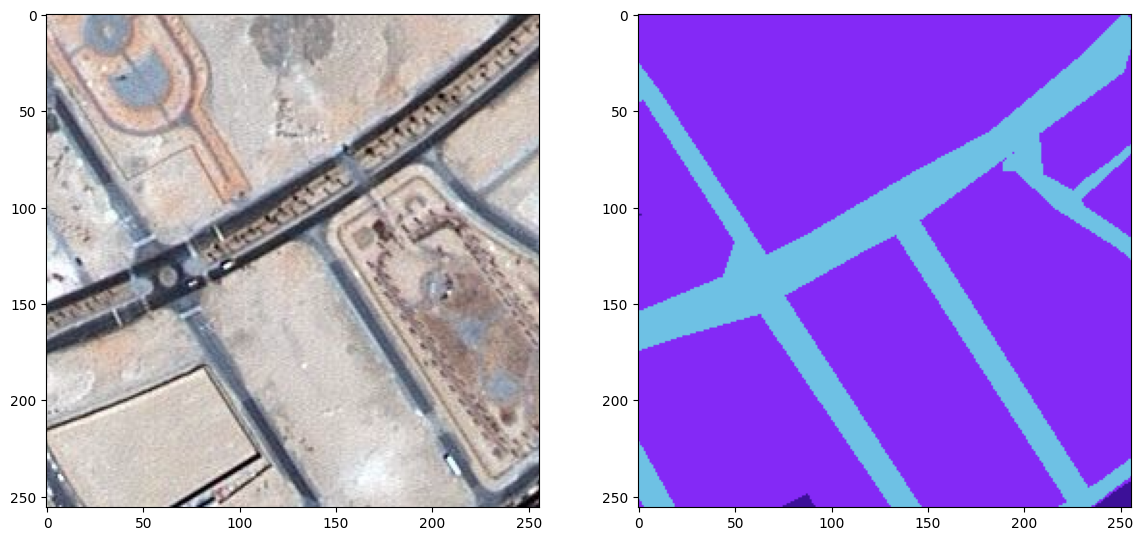

In [ ]:
# type(image_dataset[0]) # type is np array
# type(np.reshape(image_dataset[0], (image_patch_size, image_patch_size, 3) ))
 # the above both codes generate the np array as type of img both are the same

random_image_id = random.randint(0, len(image_dataset))

plt.figure(figsize=(14,8))

plt.subplot(121)
plt.imshow(image_dataset[random_image_id])

plt.subplot(122)
plt.imshow(mask_dataset[random_image_id])

In [ ]:
## one hot encoding

class_building = '#3C1098'
class_building = class_building.lstrip('#')
class_building=np.array(tuple(int(class_building[i:i+2],16) for i in (0,2,4)))
print(class_building)

class_land = '#8429F6'
class_land = class_land.lstrip('#')
class_land=np.array(tuple(int(class_land[i:i+2],16) for i in (0,2,4)))
print(class_land)

class_road = '#6EC1E4'
class_road = class_road.lstrip('#')
class_road=np.array(tuple(int(class_road[i:i+2],16) for i in (0,2,4)))
print(class_road)

class_vegetation = '#FEDD3A'
class_vegetation = class_vegetation.lstrip('#')
class_vegetation=np.array(tuple(int(class_vegetation[i:i+2],16) for i in (0,2,4)))
print(class_vegetation)

class_water = '#E2A929'
class_water = class_water.lstrip('#')
class_water=np.array(tuple(int(class_water[i:i+2],16) for i in (0,2,4)))
print(class_water)

class_unlabeled = '#9B9B9B'
class_unlabeled = class_unlabeled.lstrip('#')
class_unlabeled=np.array(tuple(int(class_unlabeled[i:i+2],16) for i in (0,2,4)))
print(class_unlabeled)


[ 60  16 152]
[132  41 246]
[110 193 228]
[254 221  58]
[226 169  41]
[155 155 155]


In [ ]:
# checking for the mask_dataset type and setting it for further processing

# for i in range(0,945):
#   np.array(mask_dataset)
print(type(mask_dataset))
np.array(mask_dataset[0])
print(type(mask_dataset[0]))
#mask_dataset.shape[0]

mask_dataset=np.array(mask_dataset)
print(type(mask_dataset))
print(mask_dataset.shape[0])


<class 'list'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
945


In [ ]:
label = individual_patched_mask

In [ ]:
def rgb_to_label(label):
  label_segment =  np.zeros(label.shape, dtype= np.uint8)
  label_segment[np.all(label == class_water , axis = -1)] = 0
  label_segment[np.all(label == class_land , axis = -1)] = 1
  label_segment[np.all(label == class_road , axis = -1)] = 2
  label_segment[np.all(label == class_building , axis = -1)] = 3
  label_segment[np.all(label == class_vegetation , axis = -1)] = 4
  label_segment[np.all(label == class_unlabeled , axis = -1)] = 5

  #print(label_segment)
  label_segment = label_segment[:,:,0]
  print(label_segment)
  #label_segment = 1
  return label_segment

In [ ]:

labels=[]
#mask_dataset=np.array(mask_dataset)

for i in range(mask_dataset.shape[0]):
  label=rgb_to_label(mask_dataset[i])
  labels.append(label)


Streaming output truncated to the last 5000 lines.
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[5 5 5 ... 1 1 1]
 [5 5 5 ... 1 1 1]
 [5 5 5 ... 1 1 1]
 ...
 [0 0 1 ... 1 1 1]
 [0 0 1 ... 1 1 1]
 [0 0 1 ... 1 1 1]]
[[1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 ...
 [1 1 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]]
[[1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 ...
 [0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]]
[[1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 ...
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]]
[[0 0 1 ... 1 1 1]
 [0 0 1 ... 1 1 1]
 [0 0 1 ... 1 1 1]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[1 1 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]
 ...
 [0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]]
[[0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]
 ...
 [1 1 1 

945


array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=uint8)
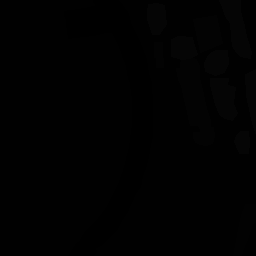

In [ ]:
print(len(labels))
labels=np.array(labels)
labels[0]

In [ ]:
labels=np.expand_dims(labels, axis=3)
labels[0]

array([[[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]],

       [[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]],

       [[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]],

       ...,

       [[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]],

       [[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]],

       [[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]]], dtype=uint8)

In [ ]:
#np.unique(labels)
# np.unique(labels)
print("Total unique labels based on masks: ",format(np.unique(labels)))

Total unique labels based on masks:  [0 1 2 3 4 5]


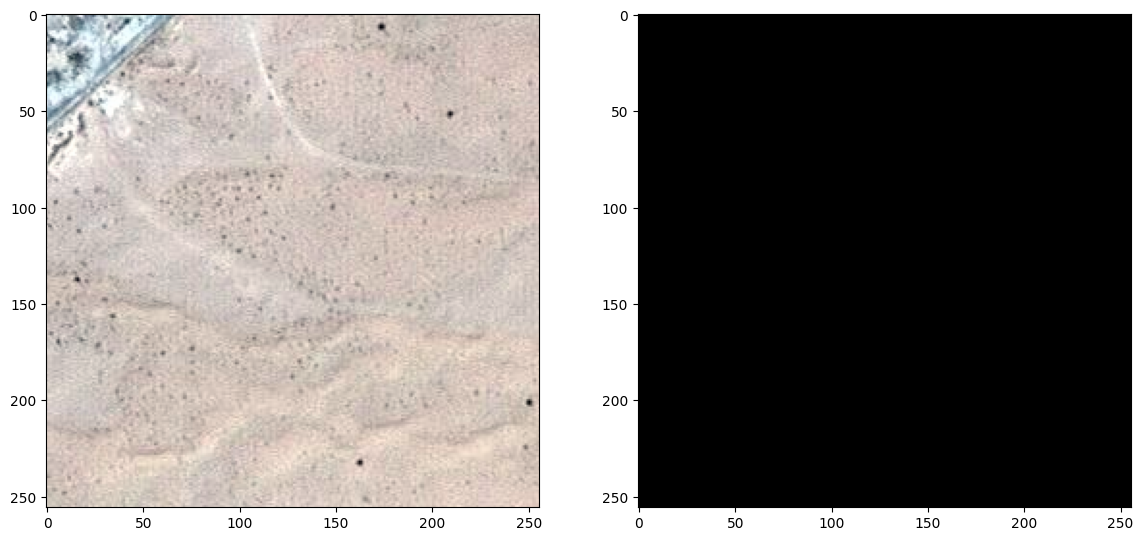

In [ ]:
import matplotlib.pyplot as plt
import random

# Assuming image_dataset and labels are already defined
random_image_id = random.randint(0, len(image_dataset) - 1)

plt.figure(figsize=(14,8))

plt.subplot(121)
plt.imshow(image_dataset[random_image_id])

# Adjusted indexing for labels
plt.subplot(122)
plt.imshow(labels[random_image_id], cmap='gray')  # Using cmap='gray' for single channel  cuz [:,:,0] not working

plt.show()


In [ ]:
print(labels[0][0])
# print(labels[0][:,:,0])
print(labels[0, :])  # Access the first row
print(labels[:, 0])  # Access the first column




[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]


In [ ]:
# labels = np.array(labels)
# labels = np.expand_dims(labels, axis=3)
total_classes = len(np.unique(labels))
total_classes

6

In [ ]:
from tensorflow.keras.utils import to_categorical

In [ ]:
labels_categorical_dataset = to_categorical(labels, num_classes=total_classes)
print(labels_categorical_dataset.shape)
print(labels_categorical_dataset)

(945, 256, 256, 6)
[[[[0. 1. 0. 0. 0. 0.]
   [0. 1. 0. 0. 0. 0.]
   [0. 1. 0. 0. 0. 0.]
   ...
   [0. 1. 0. 0. 0. 0.]
   [0. 1. 0. 0. 0. 0.]
   [0. 1. 0. 0. 0. 0.]]

  [[0. 1. 0. 0. 0. 0.]
   [0. 1. 0. 0. 0. 0.]
   [0. 1. 0. 0. 0. 0.]
   ...
   [0. 1. 0. 0. 0. 0.]
   [0. 1. 0. 0. 0. 0.]
   [0. 1. 0. 0. 0. 0.]]

  [[0. 1. 0. 0. 0. 0.]
   [0. 1. 0. 0. 0. 0.]
   [0. 1. 0. 0. 0. 0.]
   ...
   [0. 1. 0. 0. 0. 0.]
   [0. 1. 0. 0. 0. 0.]
   [0. 1. 0. 0. 0. 0.]]

  ...

  [[0. 1. 0. 0. 0. 0.]
   [0. 1. 0. 0. 0. 0.]
   [0. 1. 0. 0. 0. 0.]
   ...
   [0. 1. 0. 0. 0. 0.]
   [0. 1. 0. 0. 0. 0.]
   [0. 1. 0. 0. 0. 0.]]

  [[0. 1. 0. 0. 0. 0.]
   [0. 1. 0. 0. 0. 0.]
   [0. 1. 0. 0. 0. 0.]
   ...
   [0. 1. 0. 0. 0. 0.]
   [0. 1. 0. 0. 0. 0.]
   [0. 1. 0. 0. 0. 0.]]

  [[0. 1. 0. 0. 0. 0.]
   [0. 1. 0. 0. 0. 0.]
   [0. 1. 0. 0. 0. 0.]
   ...
   [0. 1. 0. 0. 0. 0.]
   [0. 1. 0. 0. 0. 0.]
   [0. 1. 0. 0. 0. 0.]]]


 [[[0. 1. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0. 1.]
   [0. 0. 0. 0. 0. 1.]
   ...
   [1. 0. 0. 0

In [ ]:
master_training_dataset = image_dataset


In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
master_training_dataset = np.array(master_training_dataset)
labels_categorical_dataset = np.array(labels_categorical_dataset)

X_train,X_test ,y_train,y_test = train_test_split( master_training_dataset, labels_categorical_dataset, test_size=0.2,random_state=100)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(756, 256, 256, 3)
(189, 256, 256, 3)
(756, 256, 256, 6)
(189, 256, 256, 6)


In [ ]:
image_height = X_train.shape[1]
image_width = X_train.shape[2]
image_channels = X_train.shape[3]
total_classes = y_train.shape[3]

print(image_height)
print(image_width)
print(image_channels)
print(total_classes)

256
256
3
6


# **Model Making**

In [ ]:
!pip install -U segmentation-models

In [ ]:
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, Conv2DTranspose
from keras.layers import concatenate, BatchNormalization, Dropout, Lambda
from keras import backend as K

In [ ]:
def jaccard_coef(y_true, y_pred):
  y_true_flatten = K.flatten(y_true)
  y_pred_flatten = K.flatten(y_pred)
  intersection = K.sum(y_true_flatten * y_pred_flatten)
  final_coef_value = (intersection + 1.0) / (K.sum(y_true_flatten) + K.sum(y_pred_flatten) - intersection + 1.0)
  return final_coef_value

In [ ]:
def multi_unet_model(n_classes=5, image_height=256, image_width=256, image_channels=1):

  inputs = Input((image_height, image_width, image_channels))

  source_input = inputs

  c1 = Conv2D(16, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(source_input)
  c1 = Dropout(0.2)(c1)
  c1 = Conv2D(16, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c1)
  p1 = MaxPooling2D((2,2))(c1)

  c2 = Conv2D(32, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(p1)
  c2 = Dropout(0.2)(c2)
  c2 = Conv2D(32, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c2)
  p2 = MaxPooling2D((2,2))(c2)

  c3 = Conv2D(64, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(p2)
  c3 = Dropout(0.2)(c3)
  c3 = Conv2D(64, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c3)
  p3 = MaxPooling2D((2,2))(c3)

  c4 = Conv2D(128, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(p3)
  c4 = Dropout(0.2)(c4)
  c4 = Conv2D(128, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c4)
  p4 = MaxPooling2D((2,2))(c4)

  c5 = Conv2D(256, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(p4)
  c5 = Dropout(0.2)(c5)
  c5 = Conv2D(256, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c5)

  u6 = Conv2DTranspose(128, (2,2), strides=(2,2), padding="same")(c5)
  u6 = concatenate([u6, c4])
  c6 = Conv2D(128, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(u6)
  c6 = Dropout(0.2)(c6)
  c6 = Conv2D(128, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c6)

  u7 = Conv2DTranspose(64, (2,2), strides=(2,2), padding="same")(c6)
  u7 = concatenate([u7, c3])
  c7 = Conv2D(64, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(u7)
  c7 = Dropout(0.2)(c7)
  c7 = Conv2D(64, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c7)

  u8 = Conv2DTranspose(32, (2,2), strides=(2,2), padding="same")(c7)
  u8 = concatenate([u8, c2])
  c8 = Conv2D(32, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(u8)
  c8 = Dropout(0.2)(c8)
  c8 = Conv2D(32, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c8)

  u9 = Conv2DTranspose(16, (2,2), strides=(2,2), padding="same")(c8)
  u9 = concatenate([u9, c1], axis=3)
  c9 = Conv2D(16, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(u9)
  c9 = Dropout(0.2)(c9)
  c9 = Conv2D(16, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c9)

  outputs = Conv2D(n_classes, (1,1), activation="softmax")(c9)

  model = Model(inputs=[inputs], outputs=[outputs])
  return model

In [ ]:
metrics = ["accuracy", jaccard_coef]

In [ ]:
print(image_height)
print(image_width)
print(image_channels)
print(total_classes)

256
256
3
6


In [ ]:
def get_deep_learning_model():
  return multi_unet_model(n_classes=total_classes,
                          image_height=image_height,
                          image_width=image_width,
                          image_channels=image_channels)

In [ ]:
model = get_deep_learning_model()

In [ ]:
# Please uncomment this line to get model confiuration
# model.get_config()

   
# **Generating Loss Function**

*  dice loss > Focal Loss > Total Loss  
*  Total Loss = (Dice loss + (1*Focal Loss))




In [ ]:
weights = [0.1666, 0.1666, 0.1666, 0.1666, 0.1666, 0.1666]

In [ ]:
# # # !pip install tensorflow==2.4.1 keras==2.4.3 segmentation-models==1.0.1
# # # import tensorflow as tf
# # from tensorflow.keras.utils import get_custom_objects
# # # # get_custom_objects().update(custom_objects)
# # # from tensorflow.keras import backend as K
# # !pip install -U segmentation_models
# # import segmentation_models as sm

# # Uninstall existing keras and tensorflow to avoid conflicts
# !pip uninstall -y keras tensorflow

# # Install specific compatible versions
# !pip install tensorflow==2.8.0 keras==2.8.0 segmentation_models

# # Restart the runtime (manually or programmatically)
# import os
# os.kill(os.getpid(), 9)

# # Import libraries after restart
# import tensorflow as tf
# from tensorflow.keras import backend as K
# import segmentation_models as sm



In [ ]:
import segmentation_models as sm

In [ ]:
dice_loss = sm.losses.DiceLoss(class_weights = weights)

In [ ]:
focal_loss = sm.losses.CategoricalFocalLoss()

In [ ]:
total_loss = dice_loss + (1 * focal_loss)

# **Visualize Model with Keras**

In [ ]:
import keras
from IPython.display import clear_output

%matplotlib inline

In [ ]:
class PlotLoss(keras.callbacks.Callback):
  def on_train_begin(self, logs={}):
    self.i = 0
    self.x = []
    self.losses = []
    self.val_losses = []

    self.jaccard_coef = []
    self.val_jaccard_coef = []

    self.fig = plt.figure()
    self.logs = []

  def on_epoch_end(self, epoch, logs={}):
    self.logs.append(logs)
    self.x.append(self.i)
    # self.losses.append(logs.get('loss'))
    # self.val_losses.append(logs.get('val_loss'))

    self.jaccard_coef.append(logs.get('jaccard_coef'))
    self.val_jaccard_coef.append(logs.get('val_jaccard_coef'))

    self.i += 1

    clear_output(wait=True)
    # plt.plot(self.x, self.losses, label="loss")
    # plt.plot(self.x, self.val_losses, label="val_loss")

    plt.plot(self.x, self.jaccard_coef, label="jaccard_coef")
    plt.plot(self.x, self.val_jaccard_coef, label="val_jaccard_coef")
    plt.legend()
    plt.show();

plot_loss = PlotLoss()


In [ ]:
class PlotLossEx(keras.callbacks.Callback):
  def on_train_begin(self, logs={}):
    self.i = 0
    self.x = []

    self.losses = []
    self.val_losses = []

    self.jaccard_coef = []
    self.val_jaccard_coef = []

    self.fig = plt.figure()
    self.logs = []

  def on_epoch_end(self, epoch, logs={}):
    self.logs.append(logs)
    self.x.append(self.i)

    self.losses.append(logs.get('loss'))
    self.val_losses.append(logs.get('val_loss'))

    self.jaccard_coef.append(logs.get('jaccard_coef'))
    self.val_jaccard_coef.append(logs.get('val_jaccard_coef'))

    self.i += 1

    plt.figure(figsize=(14,8))
    f, (graph1, graph2) = plt.subplots(1,2, sharex=True)

    clear_output(wait=True)

    graph1.set_yscale('log')
    graph1.plot(self.x, self.losses, label="loss")
    graph1.plot(self.x, self.val_losses, label="val_loss")
    graph1.legend()

    graph2.set_yscale('log')
    graph2.plot(self.x, self.jaccard_coef, label="jaccard_coef")
    graph2.plot(self.x, self.val_jaccard_coef, label="val_jaccard_coef")
    graph2.legend()

    plt.show();

plot_loss = PlotLossEx()

In [ ]:
import tensorflow as tf
tf.keras.backend.clear_session()
model.compile(optimizer="adam", loss=total_loss, metrics=metrics)

# **Model compilation**


In [ ]:
model_history = model.fit(X_train, y_train,
                          batch_size=16,
                          verbose=1,
                          epochs=5,
                          validation_data=(X_test, y_test),
                          shuffle=False)

Epoch 1/5
32/48 [===================>..........] - ETA: 3:24 - loss: 1.0053 - accuracy: 0.5213 - jaccard_coef: 0.2336

In [ ]:
jaccard_coef = history_a.history['jaccard_coef']
val_jaccard_coef = history_a.history['val_jaccard_coef']

epochs = range(1, len(jaccard_coef) + 1)
plt.plot(epochs, jaccard_coef, 'y', label="Training IoU")
plt.plot(epochs, val_jaccard_coef, 'r', label="Validation IoU")
plt.title("Training Vs Validation IoU")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [ ]:
model_history.params

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
print(len(y_pred))
print(y_pred)
y_pred_argmax = np.argmax(y_pred, axis=3)
print(len(y_pred_argmax))
print(y_pred_argmax)

189
[[[[0.19811487 0.12930432 0.14141998 0.25263834 0.11712492 0.16139759]
   [0.2260691  0.10785896 0.15920386 0.23891337 0.10545284 0.16250189]
   [0.22350577 0.11375054 0.15240797 0.2429089  0.11927104 0.14815581]
   ...
   [0.20871782 0.13370752 0.15518773 0.21771069 0.1260277  0.15864854]
   [0.20936848 0.13621855 0.16391551 0.18946907 0.1215905  0.17943789]
   [0.18782626 0.15547231 0.17828915 0.15401392 0.14678797 0.17761037]]

  [[0.18961105 0.16398218 0.1552982  0.19083634 0.14672057 0.15355162]
   [0.23693945 0.12635861 0.18265198 0.16288348 0.11352778 0.17763875]
   [0.22887537 0.13854267 0.1733535  0.15856028 0.11501725 0.18565099]
   ...
   [0.20155299 0.14393231 0.15634626 0.19818358 0.13327104 0.1667138 ]
   [0.20875666 0.14048138 0.17148405 0.1623083  0.114664   0.20230561]
   [0.18271957 0.16292815 0.1680281  0.16154157 0.14750639 0.17727622]]

  [[0.16322462 0.16777784 0.18203837 0.17743546 0.17089011 0.13863368]
   [0.24587685 0.11425844 0.17612253 0.17326765 0.11561

In [ ]:
y_test_argmax = np.argmax(y_test, axis=3)
print(y_test_argmax)

[[[3 3 3 ... 1 1 1]
  [3 3 3 ... 3 3 3]
  [3 3 3 ... 3 3 3]
  ...
  [0 0 0 ... 1 1 1]
  [0 0 0 ... 1 1 1]
  [0 0 0 ... 1 1 1]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[2 2 2 ... 1 1 1]
  [2 2 2 ... 1 1 1]
  [2 2 2 ... 1 1 1]
  ...
  [2 2 2 ... 0 0 0]
  [2 2 2 ... 0 0 0]
  [2 2 1 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[1 1 1 ... 0 0 0]
  [1 1 1 ... 0 0 0]
  [1 1 1 ... 0 0 0]
  ...
  [2 2 2 ... 0 0 0]
  [2 2 2 ... 0 0 0]
  [2 2 2 ... 0 0 0]]

 [[3 3 3 ... 1 1 1]
  [3 3 3 ... 1 1 1]
  [3 3 3 ... 1 1 1]
  ...
  [1 1 1 ... 1 1 1]
  [1 1 1 ... 1 1 1]
  [4 1 1 ... 1 1 1]]]


# **Comparing prediction results**

*   using test images using mask images and predicted result images..



In [ ]:
import random


In [ ]:
test_image_number = random.randint(0, len(X_test))

test_image = X_test[test_image_number]
ground_truth_image = y_test_argmax[test_image_number]

test_image_input = np.expand_dims(test_image, 0)

prediction = model.predict(test_image_input)
predicted_image = np.argmax(prediction, axis=3)
predicted_image = predicted_image[0,:,:]


In [ ]:
!pip install segmentation_models

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 3.9 MB/s eta 0:00:00


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Conv2DTranspose, concatenate, Dropout

# Define your UNet model architecture
def multi_unet_model(n_classes, image_height, image_width, image_channels):
    inputs = Input((image_height, image_width, image_channels))

    c1 = Conv2D(16, (3, 3), activation="relu", kernel_initializer="he_normal", padding="same")(inputs)
    c1 = Dropout(0.2)(c1)
    c1 = Conv2D(16, (3, 3), activation="relu", kernel_initializer="he_normal", padding="same")(c1)
    p1 = MaxPooling2D((2, 2))(c1)

    c2 = Conv2D(32, (3, 3), activation="relu", kernel_initializer="he_normal", padding="same")(p1)
    c2 = Dropout(0.2)(c2)
    c2 = Conv2D(32, (3, 3), activation="relu", kernel_initializer="he_normal", padding="same")(c2)
    p2 = MaxPooling2D((2, 2))(c2)

    c3 = Conv2D(64, (3, 3), activation="relu", kernel_initializer="he_normal", padding="same")(p2)
    c3 = Dropout(0.2)(c3)
    c3 = Conv2D(64, (3, 3), activation="relu", kernel_initializer="he_normal", padding="same")(c3)
    p3 = MaxPooling2D((2, 2))(c3)

    c4 = Conv2D(128, (3, 3), activation="relu", kernel_initializer="he_normal", padding="same")(p3)
    c4 = Dropout(0.2)(c4)
    c4 = Conv2D(128, (3, 3), activation="relu", kernel_initializer="he_normal", padding="same")(c4)
    p4 = MaxPooling2D((2, 2))(c4)

    c5 = Conv2D(256, (3, 3), activation="relu", kernel_initializer="he_normal", padding="same")(p4)
    c5 = Dropout(0.2)(c5)
    c5 = Conv2D(256, (3, 3), activation="relu", kernel_initializer="he_normal", padding="same")(c5)

    u6 = Conv2DTranspose(128, (2, 2), strides=(2, 2), padding="same")(c5)
    u6 = concatenate([u6, c4])
    c6 = Conv2D(128, (3, 3), activation="relu", kernel_initializer="he_normal", padding="same")(u6)
    c6 = Dropout(0.2)(c6)
    c6 = Conv2D(128, (3, 3), activation="relu", kernel_initializer="he_normal", padding="same")(c6)

    u7 = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding="same")(c6)
    u7 = concatenate([u7, c3])
    c7 = Conv2D(64, (3, 3), activation="relu", kernel_initializer="he_normal", padding="same")(u7)
    c7 = Dropout(0.2)(c7)
    c7 = Conv2D(64, (3, 3), activation="relu", kernel_initializer="he_normal", padding="same")(c7)

    u8 = Conv2DTranspose(32, (2, 2), strides=(2, 2), padding="same")(c7)
    u8 = concatenate([u8, c2])
    c8 = Conv2D(32, (3, 3), activation="relu", kernel_initializer="he_normal", padding="same")(u8)
    c8 = Dropout(0.2)(c8)
    c8 = Conv2D(32, (3, 3), activation="relu", kernel_initializer="he_normal", padding="same")(c8)

    u9 = Conv2DTranspose(16, (2, 2), strides=(2, 2), padding="same")(c8)
    u9 = concatenate([u9, c1])
    c9 = Conv2D(16, (3, 3), activation="relu", kernel_initializer="he_normal", padding="same")(u9)
    c9 = Dropout(0.2)(c9)
    c9 = Conv2D(16, (3, 3), activation="relu", kernel_initializer="he_normal", padding="same")(c9)

    outputs = Conv2D(n_classes, (1, 1), activation="softmax")(c9)

    model = Model(inputs=[inputs], outputs=[outputs])
    return model

# Define parameters
image_height = 256
image_width = 256
image_channels = 3
n_classes = 6  # Update this with your actual number of classes

# Rebuild the model
model = multi_unet_model(n_classes, image_height, image_width, image_channels)

# Load the weights
model.load_weights('/content/drive/MyDrive/unet_model.h5')

# Print the model summary
model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 256, 256, 16)         448       ['input_1[0][0]']             
                                                                                                  
 dropout (Dropout)           (None, 256, 256, 16)         0         ['conv2d[0][0]']              
                                                                                                  
 conv2d_1 (Conv2D)           (None, 256, 256, 16)         2320      ['dropout[0][0]']             
                                                                                              

In [ ]:
!pip install pydot
!pip install graphviz

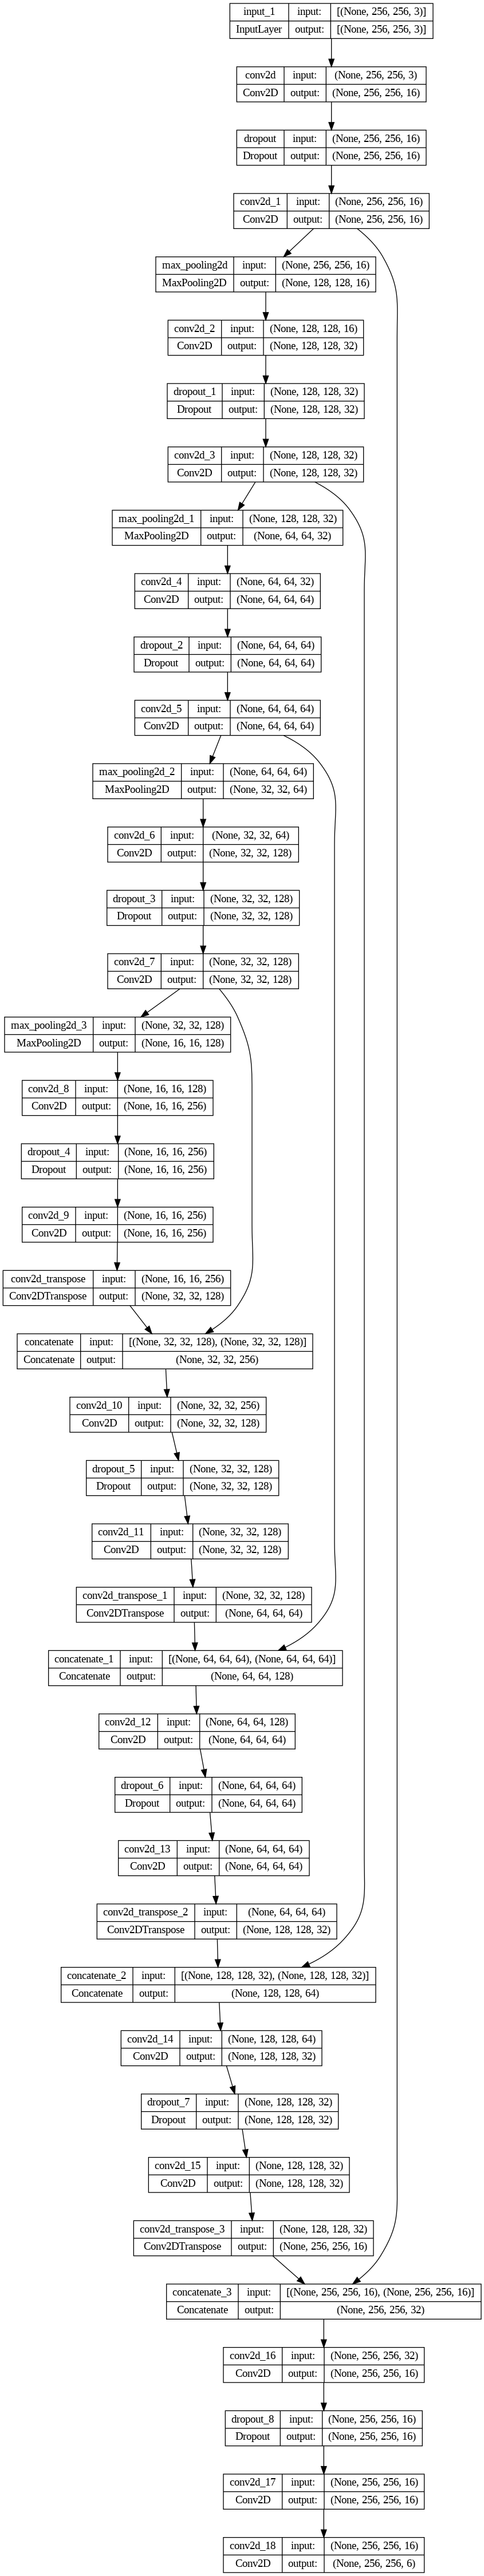

In [ ]:
from tensorflow.keras.utils import plot_model

# Visualize the model architecture and save it as an image
plot_model(model, to_file='unet_model_architecture.png', show_shapes=True)


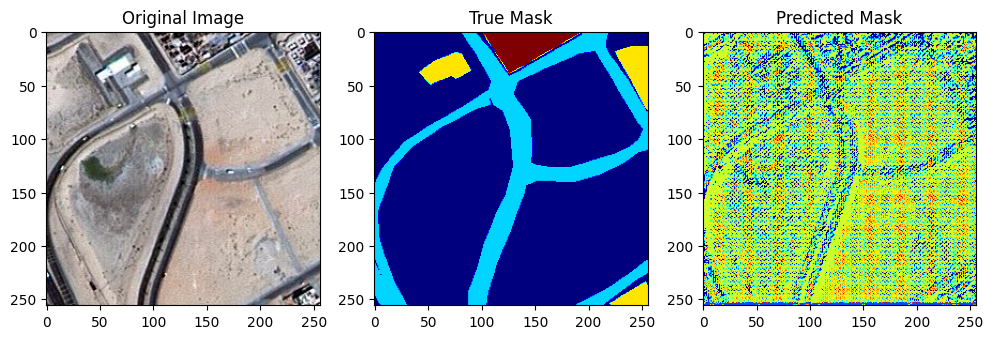

In [ ]:
## Compare Predicted Results with Original Results

import numpy as np
import matplotlib.pyplot as plt
import random

# Assuming X_test and y_test are already defined and loaded
# If not, you need to load/preprocess your test data similarly as done for training data

# Make predictions on the test data
predictions = model.predict(X_test)

# Function to decode one-hot encoded labels
def one_hot_decode(one_hot):
    return np.argmax(one_hot, axis=-1)

# Select a random test image
index = random.randint(0, len(X_test) - 1)
test_image = X_test[index]
true_mask = y_test[index]
predicted_mask = predictions[index]

# Decode the true and predicted masks
true_mask_decoded = one_hot_decode(true_mask)
predicted_mask_decoded = one_hot_decode(predicted_mask)

# Plot the original image, true mask, and predicted mask
plt.figure(figsize=(12, 8))

plt.subplot(1, 3, 1)
plt.title('Original Image')
plt.imshow(test_image)

plt.subplot(1, 3, 2)
plt.title('True Mask')
plt.imshow(true_mask_decoded, cmap='jet')

plt.subplot(1, 3, 3)
plt.title('Predicted Mask')
plt.imshow(predicted_mask_decoded, cmap='jet')

plt.show()


Image shape: (1, 256, 256, 3)


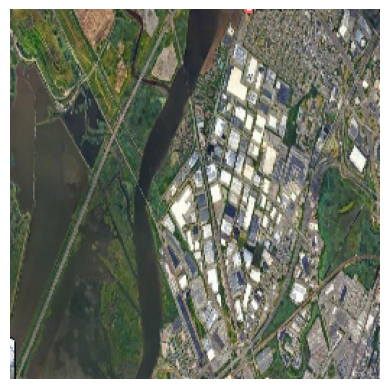

1/1 [==============================] - 0s 163ms/step
Predicted class: [[1 1 1 ... 3 3 3]
 [1 1 1 ... 3 3 3]
 [1 1 3 ... 3 3 3]
 ...
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]]


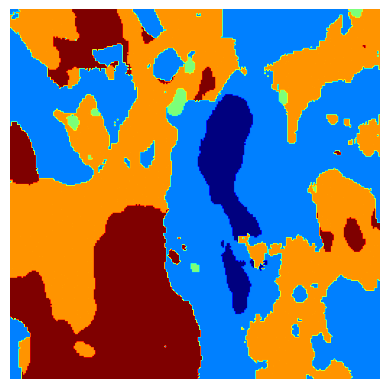

In [ ]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt

# Define the path to your image
image_path = '/content/drive/MyDrive/original_satellite_img.png'  # Update this path to your image location

# Load the image with the target size
image = load_img(image_path, target_size=(256, 256))  # Adjust target size as per your model input size

# Convert the image to a numpy array
image_array = img_to_array(image)

# Normalize the image array if your model requires it
image_array = image_array / 255.0  # Assuming your model was trained on normalized images

# Expand dimensions to match the model input shape (batch size, height, width, channels)
image_array = np.expand_dims(image_array, axis=0)

# Print the shape to confirm
print("Image shape:", image_array.shape)

# Display the image
plt.imshow(image)
plt.axis('off')
plt.show()

# Make a prediction
prediction = model.predict(image_array)

# Process the prediction result if needed (e.g., argmax for classification, thresholding for segmentation)
predicted_class = np.argmax(prediction, axis=-1)

# Since the prediction result might be a batch, take the first element
predicted_class = predicted_class[0]

# Print the prediction result
print("Predicted class:", predicted_class)

# Visualize the prediction if it is a segmentation map
plt.imshow(predicted_class, cmap='jet')
plt.axis('off')
plt.show()
